In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:

dataset=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\Airlines+Data.csv",index_col='Month', parse_dates=True)
dataset

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [3]:
dataset.head()

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


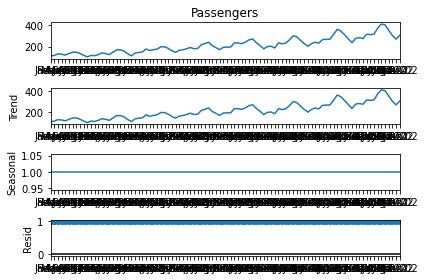

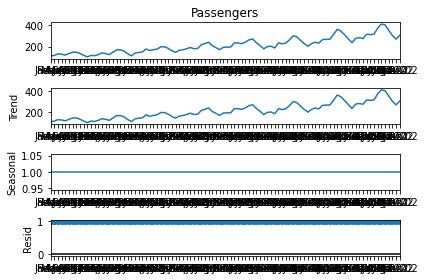

In [4]:
result=seasonal_decompose(dataset['Passengers'],model='multiplicative',period=1)
result.plot()

In [5]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(dataset['Passengers'],start_p=1,start_q=1,max_p=3,
                        max_q=3,m=12,start_P=0,seasonal=True,
                       d=None,D=1,trace=True,error_action='ignore',
                       suppress_warnings=True,stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.45 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.11 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.19 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.14 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.45 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Fri, 22 Apr 2022   AIC                            615.965
Time:                                    11:52:24   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
train=dataset.iloc[:len(dataset)-12]
test=dataset.iloc[len(dataset)-12:]


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Fri, 22 Apr 2022   AIC                            533.783
Time:                                    11:52:27   BIC                            545.096
Sample:                                         0   HQIC                           538.282
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2146      0.112     -1.913      0.056      -0.434       0.005
ar.S.L12      -1.2044      0.875     -1.376      0.169      -2.920       0.511
ar.S.L24      -0.3644      0.246     -1.480      0.139      -0.847       0.118
ma.S.L12       0.9996    255.413      0.004      0.997    -499.600     501.599
sigma2        83.3795   2.12e+04      0.004      0.997   -4.15e+04    4.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

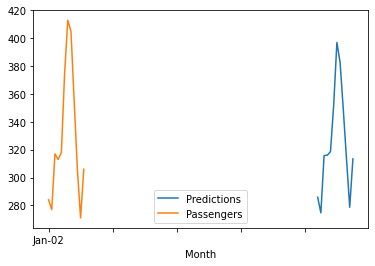

In [8]:
start=len(train)
end=len(train)+len(test)-1
predictions=result.predict(start,end,typ='levels').rename("Predictions")
predictions.plot(legend=True)
test['Passengers'].plot(legend=True)

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["Passengers"],predictions)


11.026339167346759

In [10]:
mean_squared_error(test["Passengers"],predictions)

121.58015543336522

<AxesSubplot:xlabel='Month'>

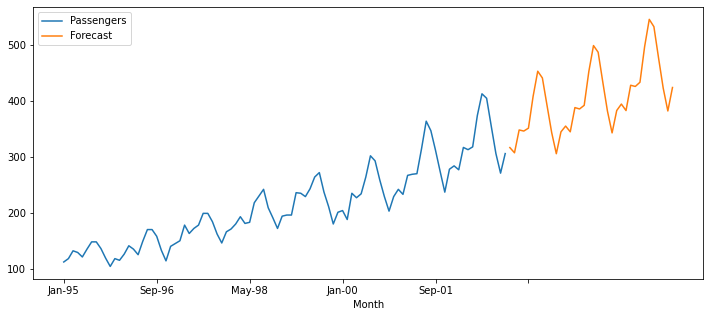

In [11]:
model=model=SARIMAX(dataset['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
result=model.fit()

forecast=result.predict(start=len(dataset),end=(len(dataset)-1)+3*12,
                      typ='levels').rename('Forecast')

dataset['Passengers'].plot(figsize=(12,5),legend=True)
forecast.plot(legend=True)